In [44]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pathlib
import glob
import PIL
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [45]:
# Laoding data using pathlib

data_dir = pathlib.Path(r"C:\Users\Faizan_Shakeel\.keras\datasets\flower_photos")  

list(data_dir.glob('*/*.jpg'))[3000:3005] 

[WindowsPath('C:/Users/Faizan_Shakeel/.keras/datasets/flower_photos/tulips/13999392173_b1411f8b23_n.jpg'),
 WindowsPath('C:/Users/Faizan_Shakeel/.keras/datasets/flower_photos/tulips/13999402743_f563f6b685_n.jpg'),
 WindowsPath('C:/Users/Faizan_Shakeel/.keras/datasets/flower_photos/tulips/14009216519_b608321cf2_n.jpg'),
 WindowsPath('C:/Users/Faizan_Shakeel/.keras/datasets/flower_photos/tulips/14014595475_5892fcda51_n.jpg'),
 WindowsPath('C:/Users/Faizan_Shakeel/.keras/datasets/flower_photos/tulips/14015957646_8317a0f1d9_n.jpg')]

In [46]:
len(list(data_dir.glob('*/*.jpg')))

3670

###  visulizing data

In [47]:
#using os module

classes = os.listdir(data_dir)
print("Classes:", classes)

Classes: ['daisy', 'dandelion', 'LICENSE.txt', 'roses', 'sunflowers', 'tulips']


In [48]:
roses= list(data_dir.glob('roses/*'))
roses[3:6]

[WindowsPath('C:/Users/Faizan_Shakeel/.keras/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/Faizan_Shakeel/.keras/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('C:/Users/Faizan_Shakeel/.keras/datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg')]

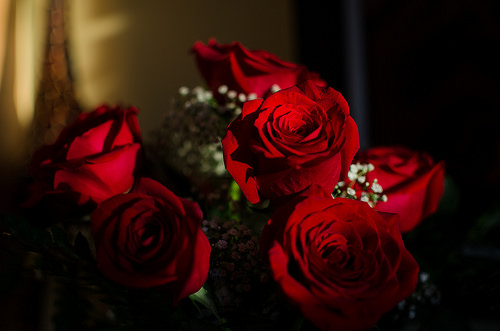

In [49]:
PIL.Image.open(str(roses[44]))

In [50]:
#lly for other flowers

tulips= list(data_dir.glob('tulips/*'))
tulips[0]

WindowsPath('C:/Users/Faizan_Shakeel/.keras/datasets/flower_photos/tulips/100930342_92e8746431_n.jpg')

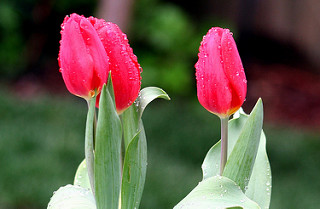

In [51]:
PIL.Image.open(tulips[0])   

#sometimes PIL doesnot take windows path so wrap them in   str()  (proper string path)

### Reading Flowers images from disk into numpy array using opencv

In [52]:
flower_images_dict= {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
    
}

In [53]:
flower_label_dict= {
    'roses': 0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
    
}

In [54]:
print(flower_label_dict['tulips'])
flower_images_dict['tulips'][:5]

4


[WindowsPath('C:/Users/Faizan_Shakeel/.keras/datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('C:/Users/Faizan_Shakeel/.keras/datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('C:/Users/Faizan_Shakeel/.keras/datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('C:/Users/Faizan_Shakeel/.keras/datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('C:/Users/Faizan_Shakeel/.keras/datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

In [55]:
#Reading Flowers images from disk into numpy array using opencv 
#cv2.imread(str(path_of_an_image))
#cv2.resize(img,(180,180)).shape     : Easily resize

img1 = cv2.imread(str(flower_images_dict['roses'][2]))
img1.shape

(333, 500, 3)

In [56]:
cv2.resize(img1,(180,180)).shape

(180, 180, 3)

In [57]:
#  preparing entire data into X and y using for loop

X, y = [],[]

for flower_name, images in flower_images_dict.items():     #iterating Dictionary (nasted)
    for image in images:
        img = cv2.imread(str(image))
        resized_img= cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flower_label_dict[flower_name])
    

In [58]:
X = np.array(X)
y = np.array(y)

### train_test_split   using   sklearn.model_selection

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=44)

# Scaling

X_train_scaled = X_train/255
X_test_scaled = X_test/255

## Building CNN and train it

In [60]:
No_of_classes = 5

model = Sequential([
    layers.Conv2D(164,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation ='relu'),
    layers.Dense(No_of_classes)
    
]) 


model.compile(optimizer='adam',
             loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])

model.fit(X_train_scaled, y_train, epochs = 5)

AttributeError: module 'keras.backend' has no attribute 'RandomGenerator'

In [ ]:
#evauate model
model.evaluate(X_test_scaled,y_test)

In [ ]:
#predictions

predictions = model.predict(X_test_scaled)

print(predictions[0])

score = tf.nn.softmax(predictions[0])
np.argmax(score)

In [ ]:
y_test[0]

# Data Augmentation to improve accuracy

In [ ]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    
                                      
                                    ])

### Dekho: Real vs Augmented Image

In [ ]:
plt.imshow(X[0])
plt.axis('off')

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

# Train the model using data augmentation and a drop out layer

In [ ]:
No_of_classes = 5

final_model = Sequential([
    data_augmentation,
    layers.Conv2D(16,3, padding ='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Dropout(0.2),      #dropout regularization
    
    layers.Flatten(),
    layers.Dense(128, activation ='relu'),
    layers.Dense(No_of_classes)
    
]) 


final_model.compile(optimizer='adam',
             loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])

final_model.fit(X_train_scaled, y_train, epochs = 10)

In [ ]:
final_model.evaluate(X_test_scaled,y_test)

In [ ]:
predictions = final_model.predict(X_test_scaled)
predictions[67]

In [ ]:
score = tf.nn.softmax(predictions[67])
np.argmax(score)

# Done for Now!!

In [ ]:
# Model Summary

final_model.summary()